Problem Statement 🍕
Kanav has started his own Pizza Store by getting the Franchise from the popular Pizza brand Diminos. The store currently is running completely online and Kanav has hired a team of delivery personnel to deliver the pizza on time to the customers. In order to increase the revenue and profits Kanav is already running the store 24 * 7.
As per Diminos policies, Kanav’s Pizza Store promises to deliver the pizza order within 30 minutes from the time the order was placed. Failure to meet this commitment results in the pizza being free for the customer.
Recently Diminos gave a notice to Kanav that there will be an audit scheduled and Kanav is particularly concerned about two key performance metrics: Delivery Time and Customer Satisfaction. These metrics are pivotal in determining the overall success and viability of the store, and failure to meet expectations could jeopardize the franchise relationship.

Moreover, as Kanav has hired a team of delivery personnels, he is also facing difficulty in capacity planning for the Delivery Fleet. Capacity planning for the delivery fleet is a crucial aspect for ensuring timely and efficient deliveries.


TASK
Assume that you are a freelance data scientist.
Kanav is worried that he might lose the franchise if he is not able to meet the metric and wants your help in order to understand his store's performance so that he can take some actions to prevent his business.
To address this challenge, Kanav seeks a data-driven approach to understand the store's performance and identify potential areas for improvement.
As a data science expert you are tasked with analyzing historical data related to order arrival and delivery times, and other relevant variables. You as an expert are expected to provide actionable insights and recommendations that Kanav can implement to enhance the store's performance and secure its standing with Diminos.
Help Kanav by analyzing the data and sharing insights to keep his business up and running.


                                                                                                                    Last Mile Delivery Analysis

 Import libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

Load datasets

In [20]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20


Load datasets

In [21]:
order_items = pd.read_csv('order_items.csv')
order_items.head()

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"


Load datasets

In [22]:
products = pd.read_csv('products.csv')
products.head()

,item_id,category,Item,Size,Price
0,p_001,Veg,Margherita,Regular,109
1,p_002,Veg,Margherita,Medium,245
2,p_003,Veg,Margherita,Large,455
3,p_004,Veg,Double Cheese Margherita,Regular,215
4,p_005,Veg,Double Cheese Margherita,Medium,385


Load datasets

In [23]:
deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery


Parse dates

In [36]:
orders['order_placed_at'] = pd.to_datetime(orders['order_placed_at'])
orders.head()

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20


In [37]:
deliveries['time_stamp'] = pd.to_datetime(deliveries['time_stamp'])
deliveries.head()

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery


Merge datasets

In [31]:
merged_data = orders.merge(order_items, on='order_id').merge(deliveries, on='order_id')
merged_data.head()

,order_id,order_placed_at,items_ordered,time_stamp,status
0,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02,"['p_017', 'p_012']",2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:36:02,"['p_017', 'p_012']",2020-12-11 00:41:02.000000000,Out For Delivery


Calculate delivery time

In [32]:
merged_data['delivery_time'] = merged_data['time_stamp'] - merged_data['order_placed_at']
merged_data['delivered_on_time'] = merged_data['delivery_time'] <= timedelta(minutes=30)
merged_data.head()

,order_id,order_placed_at,items_ordered,time_stamp,status,delivery_time,delivered_on_time
0,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:01:29.000000000,Pending,0 days 00:00:00,True
1,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:06:29.000000000,Out For Delivery,0 days 00:05:00,True
2,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:19:13.299151076,Delivered,0 days 00:17:44.299151076,True
3,321230115,2020-12-11 00:36:02,"['p_017', 'p_012']",2020-12-11 00:36:02.000000000,Pending,0 days 00:00:00,True
4,321230115,2020-12-11 00:36:02,"['p_017', 'p_012']",2020-12-11 00:41:02.000000000,Out For Delivery,0 days 00:05:00,True


Analyze performance metrics

In [27]:
on_time_percentage = merged_data['delivered_on_time'].mean() * 100
print(f'Percentage of orders delivered on time: {on_time_percentage:.2f}%')

Percentage of orders delivered on time: 99.55%


Visualize delivery times

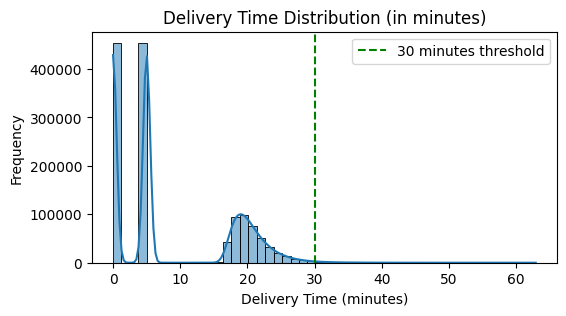

In [48]:
plt.figure(figsize=(6, 3))
sns.histplot(merged_data['delivery_time'].dt.total_seconds() / 60, bins=50, kde=True)
plt.title('Delivery Time Distribution (in minutes)')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.axvline(x=30, color='green', linestyle='--', label='30 minutes threshold')
plt.legend()
plt.show()

Analyze peak order times

In [34]:
merged_data['hour'] = merged_data['order_placed_at'].dt.hour
merged_data.head()

,order_id,order_placed_at,items_ordered,time_stamp,status,delivery_time,delivered_on_time,hour
0,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:01:29.000000000,Pending,0 days 00:00:00,True,0
1,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:06:29.000000000,Out For Delivery,0 days 00:05:00,True,0
2,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:19:13.299151076,Delivered,0 days 00:17:44.299151076,True,0
3,321230115,2020-12-11 00:36:02,"['p_017', 'p_012']",2020-12-11 00:36:02.000000000,Pending,0 days 00:00:00,True,0
4,321230115,2020-12-11 00:36:02,"['p_017', 'p_012']",2020-12-11 00:41:02.000000000,Out For Delivery,0 days 00:05:00,True,0


In [35]:
order_volume_per_hour = merged_data['hour'].value_counts().sort_index()
order_volume_per_hour.head()

hour
0    27918
1    23805
2    21891
3    19593
4    18987
Name: count, dtype: int64

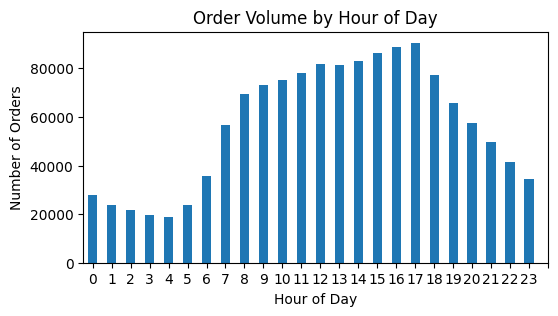

In [45]:
plt.figure(figsize=(6, 3))
order_volume_per_hour.plot(kind='bar')
plt.title('Order Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(25), rotation=0)
plt.show()